# The Tour de France - A Historical Guide


The Tour de France is an annual bicycle race in France that takes place over 21 stages covering over 3,500km on the roads of France. As the biggest event in professional cycling, it is a gruelling race that incorporates both the mountains of the Alps and the Pyrenees and is regarded as an acheivement to complete race suffering neither injury nor disqualification, although suffering in general is regarded as a given.  It is a race steeped in history, controversy and legend. 

The purpose of this notebook is to examine historical Tour de France data and then to synthesise data based on same. The dataset we have chosen to work with gives details of each race since it's inception in 1903.  Included in the dataset is the number of stages, the number of starters and finishers, the distance and the pace, age, name and nationality of the winner.

In [1]:
# import libraries
import pandas as pd # import pandas library
import numpy as np # import numpy library
import matplotlib as mp # import matplotlib library
import seaborn as sns # import seaborn library for visual display

In [17]:
# import the dataset from URL
df = pd.read_csv('https://raw.githubusercontent.com/Kennymctigue/PDA2018Project/master/2018_historical_guide.csv', delimiter=',')

In [18]:
df

,Year,Stages,Started,Ended,Distance,Hour,Minutes,Seconds,Pace,Winner,Country,Age
0,1903,6,60,21,2428,94,33,0,25.679,M. Garin,Fra,32
1,1904,6,88,27,2428,96,5,56,25.265,H. Cornet,Fra,20
2,1905,11,60,24,2994,110,26,58,27.107,L. Trousselier,Fra,24
3,1906,13,82,14,4637,189,34,0,24.463,R. Pottier,Fra,27
4,1907,14,93,33,4488,158,45,5,28.470,L. Petit-Breton,Fra,24
5,1908,14,112,36,4488,156,53,29,28.740,L. Petit-Breton,Fra,25
6,1909,14,150,55,4497,157,1,22,28.658,F. Faber,Lux,22
7,1910,15,110,41,4734,162,41,30,29.099,O. Lapize,Fra,21
8,1911,15,84,28,5343,195,37,0,27.322,G. Garrigou,Fra,27
9,1912,15,131,41,5289,190,30,28,27.763,O. Defraye,Bel,24


### Plotting select items from the dataset

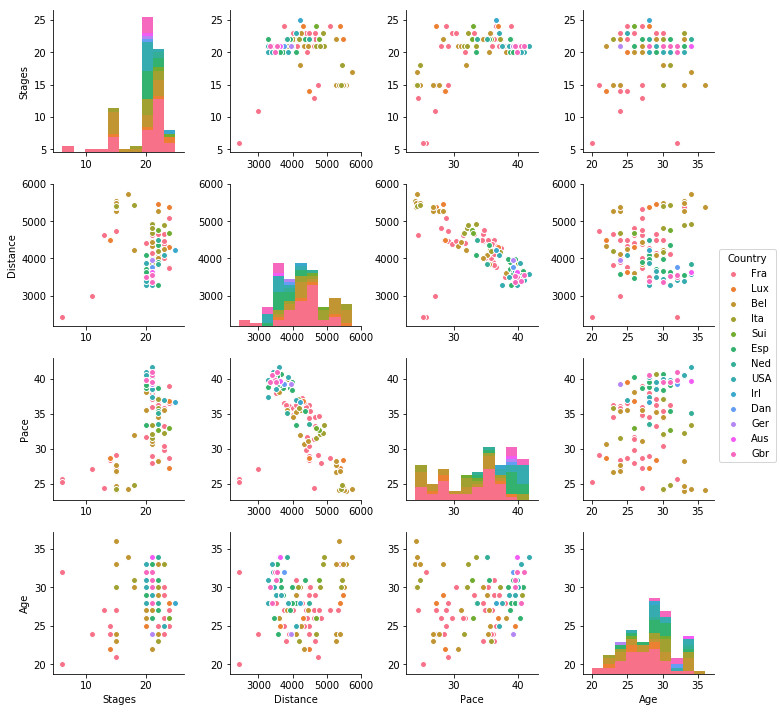

In [4]:
%matplotlib inline
sns.pairplot(df, vars=['Stages', 'Distance', 'Pace', 'Age'],hue='Country')

### Initial Analysis from the Plot

#### Country
The nationality of the winner is quite spread out.  It does not appear to be in any way influenced by the other variables and vice versa, in that we cannot claim that one country is more dominant in faster races or has younger winners.  Each of the countries that have produced numerous winners are featured across the spectrum.  This would lead us to conclude that nationality is not influential on the outcomes of the other variables.

#### Age
As with nationality, age does not appear to heavily influence the other variables as the full array of ages feature across fast races and slow races, long races and relatively short races. We can see from the histogram that the the most common age for a winner is around 28 years old, which is in keeping with expectations as professional cyclists tend to reach their peak performace levels in their late 20's and it would be quite unusual for a cyclist in their early  20's to have acheived the conditioning required to win one of the grand tours. 

#### Stages
Most races for the last ninety years have been 21 or 22 stages long.  This is the standard amount of stages now and is set to remain so for the forseeeable future so the shorter stage races in the earlier part of the 20th Century can be disregarded.  Number of stages is likely to have an impact on overall distance so this relationship will have an influence on the synthesiised data later.


#### Distance and Pace
There does appear to be some correllation between distance and pace.  It would stand to reason that a longer race would be slower as the riders would have to pace themselves accordingly but the other factor to be accounted for in this area is that the Tour de France has gotten shorter over the years, although has levelled over the past 30 years, and as training and equipment have improved, as with all sports, the times have gotten faster.  We will investigate this further below as this relationship will have an influence on the sythesised data later.

In [6]:
# Obtain summary statistics for the data set
df.describe()

,Year,Stages,Started,Ended,Distance,Hour,Minutes,Seconds,Pace,Age
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,1962.817308,20.076923,142.326923,88.355769,4232.250000,129.115385,29.096154,27.788462,34.128769,28.182692
std,33.599516,3.468841,40.687166,45.758318,697.503743,41.835626,17.288820,17.327610,5.214692,3.358121
min,1903.000000,6.000000,60.000000,11.000000,2428.000000,82.000000,0.000000,0.000000,24.056000,20.000000
25%,1932.750000,20.000000,118.250000,49.000000,3661.250000,94.750000,14.500000,14.000000,29.638250,26.000000
50%,1965.500000,21.000000,132.000000,81.500000,4180.500000,116.000000,30.000000,27.000000,35.419000,28.000000
75%,1991.250000,22.000000,182.000000,132.750000,4659.250000,148.000000,44.000000,42.000000,38.787500,30.000000
max,2017.000000,25.000000,210.000000,174.000000,5745.000000,238.000000,59.000000,59.000000,41.654000,36.000000


### Stages and Distance
We will now explore the number of stages and the overall distance.  It would be expected that the greater the number of stages the greater the overall distance but from the graphic illustration below we can see that there is very little correlation between the two.  Earlier races tended to be longer overall with fewer stages and the more recent races have been shorter overall with more stages.

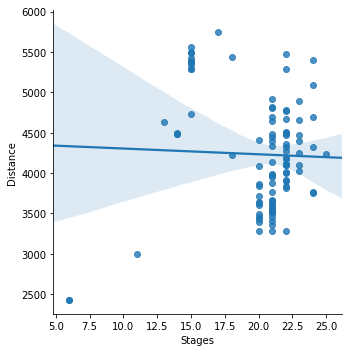

In [24]:
# plot the relationship between Stages and Distance to illustrate correlation
sns.lmplot(x='Stages', y='Distance', data=df)

As the number of race stages has become 21 as standard, it might be best to look at all races that have had 21 stages and use that as the basis on which to synthesise data.

In [33]:
# Isolate al races with a stage amount equal to 21 and observe the main summary statistics
df2 = df[df.loc[:, 'Stages'] == 21]
df2.describe()

,Year,Stages,Started,Ended,Distance,Hour,Minutes,Seconds,Pace,Age
count,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1983.266667,21.0,162.566667,115.166667,3938.200000,108.066667,30.366667,29.033333,37.137933,28.666667
std,30.216384,0.0,42.526003,46.015053,500.883592,27.499133,18.395058,16.560200,4.074881,3.099870
min,1930.000000,21.0,80.000000,43.000000,3285.000000,83.000000,0.000000,0.000000,28.000000,22.000000
25%,1952.000000,21.0,122.500000,62.250000,3544.750000,87.500000,12.000000,16.000000,34.089750,27.000000
50%,1995.000000,21.0,184.500000,129.500000,3713.500000,92.000000,31.500000,31.000000,39.227500,28.500000
75%,2007.750000,21.0,198.000000,155.750000,4382.250000,136.250000,46.750000,39.500000,39.934250,30.000000
max,2017.000000,21.0,198.000000,174.000000,4922.000000,172.000000,59.000000,59.000000,41.654000,34.000000


### Distance and Pace
We will now take a closer look at the relationship between Distance and Pace, narrowing our focus to races of 21 stages.  It would appear from the graph below that there is an even higher correlation between the two variables than when we observed races of all stages.

In [34]:
# Calculate the Correlation-Coefficient of distance and pace
df2['Distance'].corr(df['Pace'])

-0.85922635497350552

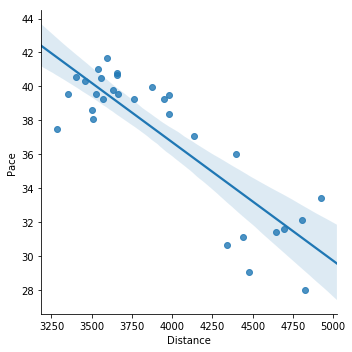

In [35]:
# plot the relationship between Distance and Pace to illustrate the negative correlation
sns.lmplot(x='Distance', y='Pace', data=df2)

In [36]:

import sklearn.neighbors as nei # import scikit-learn


In [38]:
inputs = df2[['Started', 'Ended', 'Distance', 'Pace', 'Age']]
outputs =df2['Country']

In [40]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs, outputs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [41]:
knn.predict([[170, 115, 4000, 40.00, 25]])

array(['Esp'], dtype=object)

In [65]:
# The rate of finishers will be set to the mean of finishers divided by the mean of starters
115/163


0.7055214723926381

In [66]:
sStarted = np.random.normal(loc=162, scale=43, size = 30) 
sFinished = (sStarted * .7055) 
sDistance = np.random.uniform(3285, 4922, 30)
sPace = 

In [67]:
sStarted


array([ 152.43016981,  108.04822611,  204.44277945,   72.65432706,
        109.93383223,  127.44111526,  196.23664031,  172.13190604,
        230.83132681,  130.17847891,  167.07345498,  189.20646046,
        134.24010048,  191.85126008,  171.62671351,   78.2772121 ,
        209.34856339,  153.66981502,  161.97676468,  119.21102258,
        121.88278343,  136.05749492,   98.10839216,  132.11910572,
         98.18563484,  215.54031701,  173.49000964,   96.43216299,
         94.20046839,  201.69654352])

In [68]:
sFinished

array([ 107.5394848 ,   76.22802352,  144.2343809 ,   51.25762774,
         77.55831864,   89.90970682,  138.44494974,  121.43905971,
        162.85150107,   91.84091687,  117.87032249,  133.48515785,
         94.70639089,  135.35106398,  121.08264638,   55.22457314,
        147.69541147,  108.4140545 ,  114.27460748,   84.10337643,
         85.98830371,   95.98856267,   69.21547067,   93.21002908,
         69.26996538,  152.06369365,  122.3972018 ,   68.03289099,
         66.45843045,  142.29691145])

In [62]:
sDistance

array([ 4537.36877199,  3899.09672963,  3811.36600883,  4583.52695714,
        3837.26764813,  4682.92998466,  3290.85535926,  4631.28241928,
        4919.27269488,  3674.0665462 ,  4380.99097159,  4370.60203275,
        4323.17830316,  4459.49525857,  3463.71697061,  4848.31730946,
        3302.78579651,  4279.48615612,  3676.82948169,  4493.27711719,
        4398.31120936,  3336.91386479,  4448.90467399,  3754.55131449,
        4107.84474601,  4649.35257496,  4468.25859671,  4175.48539277,
        4488.269738  ,  3990.43615252])

In [82]:
np.random.seed(1)
df3 = pd.DataFrame(np.random.normal(loc=162, scale=43, size = 30), columns=['sStarted'])
df3 = df3.assign(sFinished=df3['sStarted'] * 0.7055)
df3.insert(1, 'sDistance', np.random.uniform(3285, 4922, 30))


In [83]:
df3


,sStarted,sDistance,sFinished
0,231.846851,3756.088229,163.567953
1,135.694474,3497.856773,95.732452
2,139.288615,3316.703710,98.268118
3,115.862349,4396.253767,81.740887
4,199.212528,3631.435226,140.544439
5,63.033836,3719.699881,44.470371
6,237.026906,4089.705262,167.222482
7,129.268103,3372.354486,91.198647
8,175.718681,4224.830520,123.969530
9,151.277074,3525.194677,106.725976
